# Predicting avocado prices 


We are going to predict avocado prices and to do this we will use Facebook Prophet tool.

The dataset represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the dataset reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in dataset are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this data.

Some relevant columns in the dataset:

* **Date:**  The date of the observation.
* **AveragePrice:**  The average price of a single avocado.
* **type:**  Conventional or organic.
* **year:**  The year.
* **Region:**  The city or region of the observation.
* **Total Volume:**  Total number of avocados sold.
* **4046:**  Total number of avocados with PLU 4046 sold.
* **4225:**  Total number of avocados with PLU 4225 sold.
* **4770:** Total number of avocados with PLU 4770 sold.

***Data Source: [https://www.kaggle.com/neuromusic/avocado-prices](https://www.kaggle.com/neuromusic/avocado-prices)***

## Prophet

Prophet is open source software released by Facebook’s Core Data Science team.

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data.

In this link you have more information about Prophet with Python: 
* [https://research.fb.com/prophet-forecasting-at-scale/](https://research.fb.com/prophet-forecasting-at-scale/)
* [https://facebook.github.io/prophet/docs/quick_start.html#python-api](https://facebook.github.io/prophet/docs/quick_start.html#python-api)

# 1 - Import libraries and data exploration

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

In [2]:
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df = df.sort_values("Date")

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 11569 to 8814
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 2.1+ MB


## Missing values

In [5]:
# Let's see how many null elements are contained in the data
total = df.isnull().sum().sort_values(ascending=False) 
# missing values percentage
percent = ((df.isnull().sum())*100)/df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

,Total,Percent
Unnamed: 0,0,0.0
Date,0,0.0
AveragePrice,0,0.0
Total Volume,0,0.0
4046,0,0.0
4225,0,0.0
4770,0,0.0
Total Bags,0,0.0
Small Bags,0,0.0
Large Bags,0,0.0


## Price trend during the year

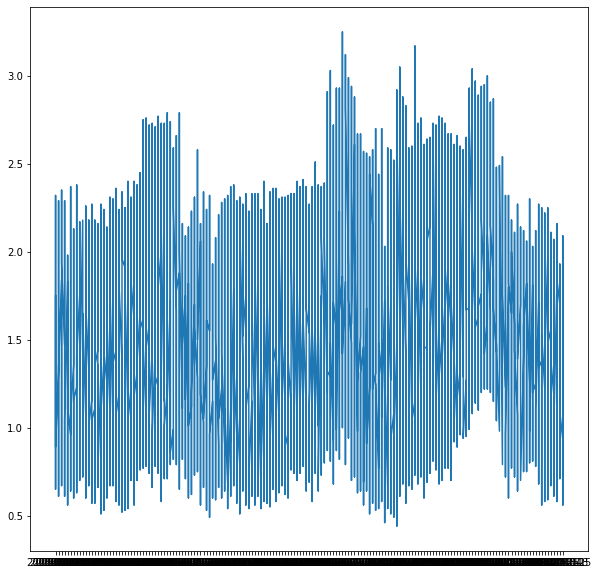

In [6]:
plt.figure(figsize=(10,10))
plt.plot(df['Date'], df['AveragePrice'])

* We see that the price of the avocado rises when it's September.

## Regions

In [7]:
df['region'].value_counts()

Jacksonville           338
Tampa                  338
BuffaloRochester       338
Portland               338
SanDiego               338
NorthernNewEngland     338
HarrisburgScranton     338
SouthCentral           338
PhoenixTucson          338
RaleighGreensboro      338
Indianapolis           338
Plains                 338
Orlando                338
Houston                338
SouthCarolina          338
West                   338
Midsouth               338
CincinnatiDayton       338
LasVegas               338
Boston                 338
Charlotte              338
Albany                 338
Nashville              338
Southeast              338
Columbus               338
Philadelphia           338
Chicago                338
Louisville             338
GrandRapids            338
Atlanta                338
BaltimoreWashington    338
Roanoke                338
Denver                 338
NewYork                338
Pittsburgh             338
TotalUS                338
Syracuse               338
S

## Year

(array([0, 1, 2, 3]),
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018')])

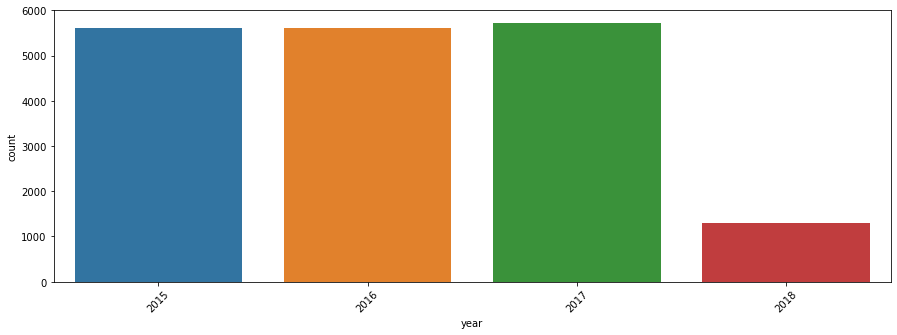

In [8]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'year', data = df)
plt.xticks(rotation = 45)

* We see less sales in 2018 because the data we have goes up to the beginning of that year.

# 2 - Data Preparation

In [9]:
df_prophet = df[['Date', 'AveragePrice']] 

In [10]:
df_prophet.tail()

,Date,AveragePrice
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70
8814,2018-03-25,1.34


# 3 - Predictions with Prophet

In [11]:
df_prophet = df_prophet.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [12]:
df_prophet.head()

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


In [13]:
m = Prophet()
m.fit(df_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [15]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.499903,0.867748,1.882390,1.499903,1.499903,-0.115033,-0.115033,-0.115033,-0.115033,-0.115033,-0.115033,0.0,0.0,0.0,1.384871
1,2015-01-11,1.494643,0.911250,1.875132,1.494643,1.494643,-0.106622,-0.106622,-0.106622,-0.106622,-0.106622,-0.106622,0.0,0.0,0.0,1.388021
2,2015-01-18,1.489382,0.873152,1.870824,1.489382,1.489382,-0.106249,-0.106249,-0.106249,-0.106249,-0.106249,-0.106249,0.0,0.0,0.0,1.383133
3,2015-01-25,1.484121,0.863967,1.840222,1.484121,1.484121,-0.125093,-0.125093,-0.125093,-0.125093,-0.125093,-0.125093,0.0,0.0,0.0,1.359028
4,2015-02-01,1.478860,0.827067,1.818152,1.478860,1.478860,-0.153293,-0.153293,-0.153293,-0.153293,-0.153293,-0.153293,0.0,0.0,0.0,1.325567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.166507,0.567666,1.636424,0.965141,1.362886,-0.086285,-0.086285,-0.086285,-0.086285,-0.086285,-0.086285,0.0,0.0,0.0,1.080222
530,2019-03-22,1.165784,0.550770,1.620799,0.963862,1.363032,-0.084558,-0.084558,-0.084558,-0.084558,-0.084558,-0.084558,0.0,0.0,0.0,1.081225
531,2019-03-23,1.165060,0.561931,1.620842,0.962620,1.363179,-0.082555,-0.082555,-0.082555,-0.082555,-0.082555,-0.082555,0.0,0.0,0.0,1.082505
532,2019-03-24,1.164337,0.581430,1.653247,0.961378,1.363220,-0.080296,-0.080296,-0.080296,-0.080296,-0.080296,-0.080296,0.0,0.0,0.0,1.084041


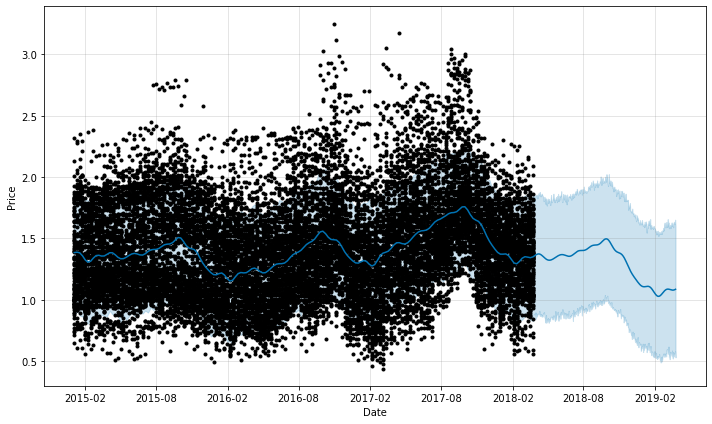

In [16]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

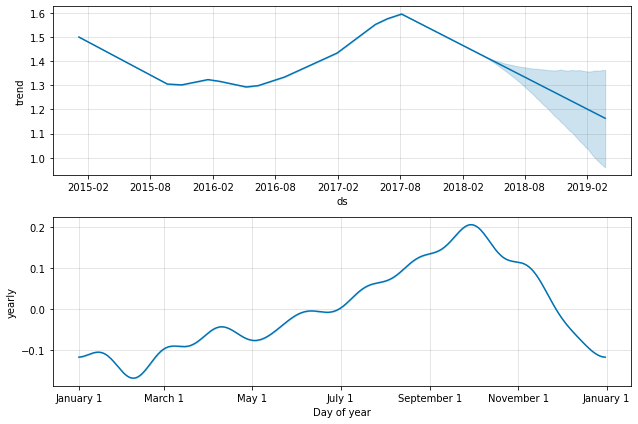

In [17]:
figure2 = m.plot_components(forecast)

# 4 - Nashville data analysis

In [18]:
df_nashville = df[df['region']=='Nashville']
df_nashville

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1403,51,2015-01-04,1.00,162162.75,113865.83,11083.58,11699.03,25514.31,19681.13,5611.51,221.67,conventional,2015,Nashville
10529,51,2015-01-04,1.84,3966.00,244.34,2700.02,76.21,945.43,838.34,107.09,0.00,organic,2015,Nashville
10528,50,2015-01-11,1.92,2892.29,204.75,2168.33,80.56,438.65,435.54,3.11,0.00,organic,2015,Nashville
1402,50,2015-01-11,1.07,149832.20,103822.60,9098.86,11665.78,25244.96,22478.92,2766.04,0.00,conventional,2015,Nashville
1401,49,2015-01-18,1.08,143464.64,97216.47,8423.57,12187.72,25636.88,23520.54,2116.34,0.00,conventional,2015,Nashville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17915,2,2018-03-11,1.32,10160.96,38.32,2553.36,0.00,7569.28,5132.05,2437.23,0.00,organic,2018,Nashville
8791,1,2018-03-18,0.89,316201.23,141265.40,11914.02,387.61,162634.20,131128.64,29834.21,1671.35,conventional,2018,Nashville
17914,1,2018-03-18,1.27,10422.05,20.41,2115.89,0.00,8285.75,4797.98,3487.77,0.00,organic,2018,Nashville
8790,0,2018-03-25,0.95,306280.52,125788.54,10713.80,334.61,169443.57,136737.44,30406.07,2300.06,conventional,2018,Nashville


In [19]:
df_nashville = df_nashville.sort_values("Date")
df_nashville

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1403,51,2015-01-04,1.00,162162.75,113865.83,11083.58,11699.03,25514.31,19681.13,5611.51,221.67,conventional,2015,Nashville
10529,51,2015-01-04,1.84,3966.00,244.34,2700.02,76.21,945.43,838.34,107.09,0.00,organic,2015,Nashville
10528,50,2015-01-11,1.92,2892.29,204.75,2168.33,80.56,438.65,435.54,3.11,0.00,organic,2015,Nashville
1402,50,2015-01-11,1.07,149832.20,103822.60,9098.86,11665.78,25244.96,22478.92,2766.04,0.00,conventional,2015,Nashville
1401,49,2015-01-18,1.08,143464.64,97216.47,8423.57,12187.72,25636.88,23520.54,2116.34,0.00,conventional,2015,Nashville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17915,2,2018-03-11,1.32,10160.96,38.32,2553.36,0.00,7569.28,5132.05,2437.23,0.00,organic,2018,Nashville
8791,1,2018-03-18,0.89,316201.23,141265.40,11914.02,387.61,162634.20,131128.64,29834.21,1671.35,conventional,2018,Nashville
17914,1,2018-03-18,1.27,10422.05,20.41,2115.89,0.00,8285.75,4797.98,3487.77,0.00,organic,2018,Nashville
8790,0,2018-03-25,0.95,306280.52,125788.54,10713.80,334.61,169443.57,136737.44,30406.07,2300.06,conventional,2018,Nashville


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


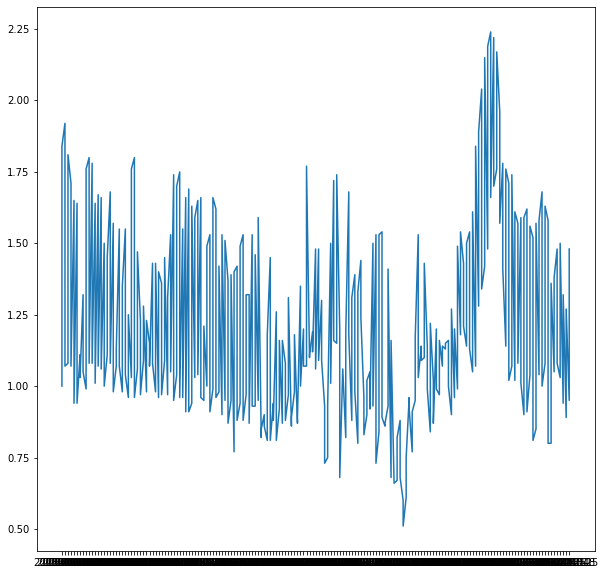

In [20]:
plt.figure(figsize=(10,10))
plt.plot(df_nashville['Date'], df_nashville['AveragePrice'])

In [21]:
df_nashville = df_nashville.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [22]:
m = Prophet()
m.fit(df_nashville)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

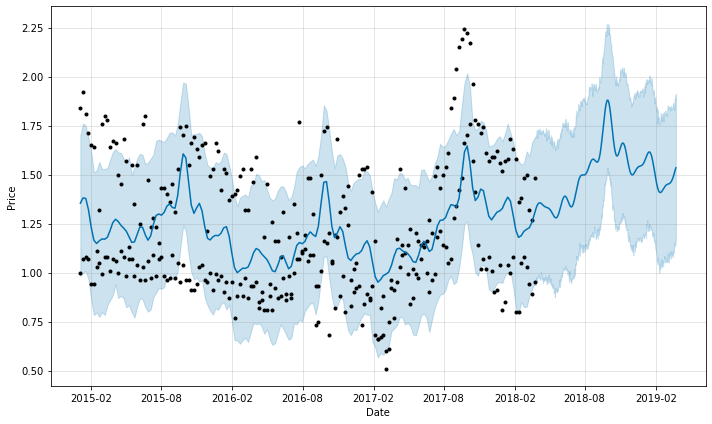

In [24]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

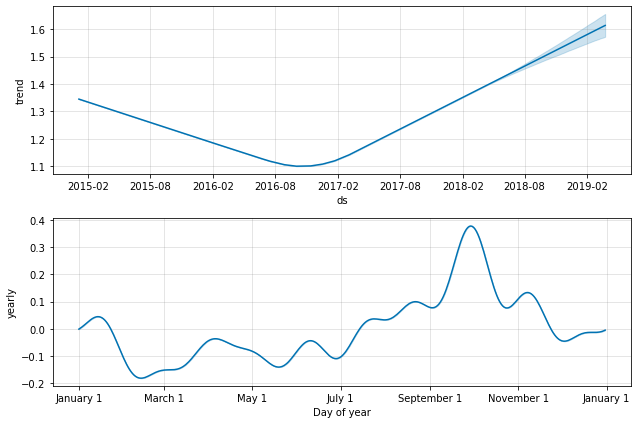

In [25]:
figure2 = m.plot_components(forecast)